## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Implement Model

In [2]:
class KNN:
    def __init__(self, k = 3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = np.array([self._predict(x) for x in X])
        return predictions
    
    def _predict(self, x):
        
        # Compute Euclidean Distance
        distances = np.array([self._euclidean_distance(x, x_train) for x_train in self.X_train])
        
        # Get the closest K labels
        k_indices = np.argsort(distances)[: self.k]
        k_nearest_labels = [self.y_train[idx] for idx in k_indices]
        
        # Majority Vote
        most_common = Counter(k_nearest_labels).most_common()[0][0]
        return most_common
        
    def _euclidean_distance(self,x1,x2):
        distance = np.sqrt(np.sum((x1-x2)**2))
        return distance

## Load Dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Split into X and Y

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (400, 2)
y shape : (400,)


## Split into training and test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape :', X_test.shape)
print('y_test Shape :', y_test.shape)

X_train Shape : (320, 2)
y_train Shape : (320,)
X_test Shape : (80, 2)
y_test Shape : (80,)


## Plot the data

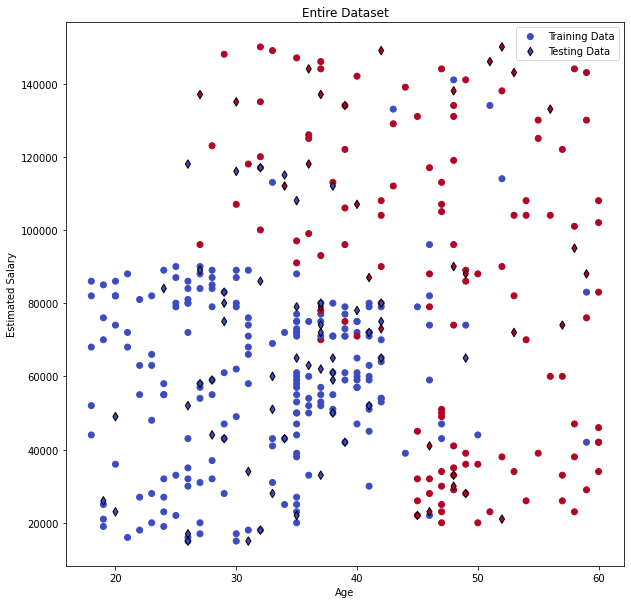

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='d', edgecolor='k', label='Testing Data')
plt.title('Entire Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Train the model and make predictions

In [8]:
classifier = KNN(k = 3)
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print(np.mean(predictions == y_test))

0.9


## Training Result

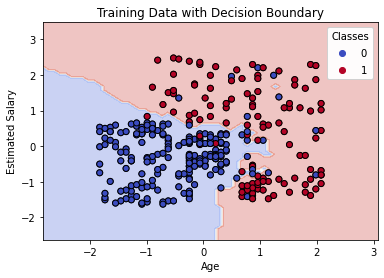

In [13]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict for every point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    
    # Plot the decision boundary by assigning a color to each point in the meshgrid
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

# Plot training results with decision boundary
plot_decision_boundary(classifier, X_train, y_train, "Training Data with Decision Boundary")

## Testing Results

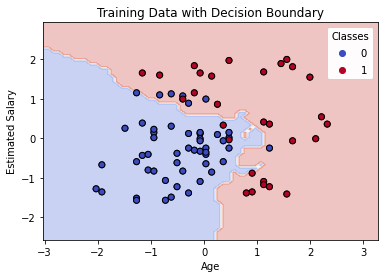

In [14]:
# Plot testing results with decision boundary
plot_decision_boundary(classifier, X_test, y_test, "Training Data with Decision Boundary")

## Use Sklearn KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3) # same as ours k = 3
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(np.mean(predictions == y_test))

0.9


## Training Result

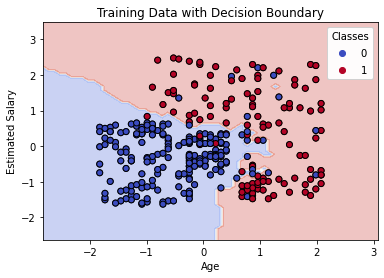

In [20]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict for every point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    
    # Plot the decision boundary by assigning a color to each point in the meshgrid
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

# Plot training results with decision boundary
plot_decision_boundary(classifier, X_train, y_train, "Training Data with Decision Boundary")

## Testing Result

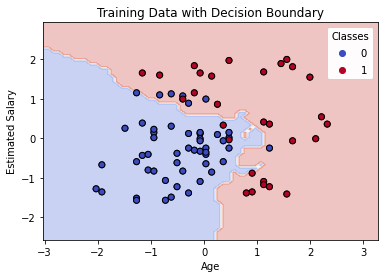

In [21]:
plot_decision_boundary(classifier, X_test, y_test, "Training Data with Decision Boundary")